In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

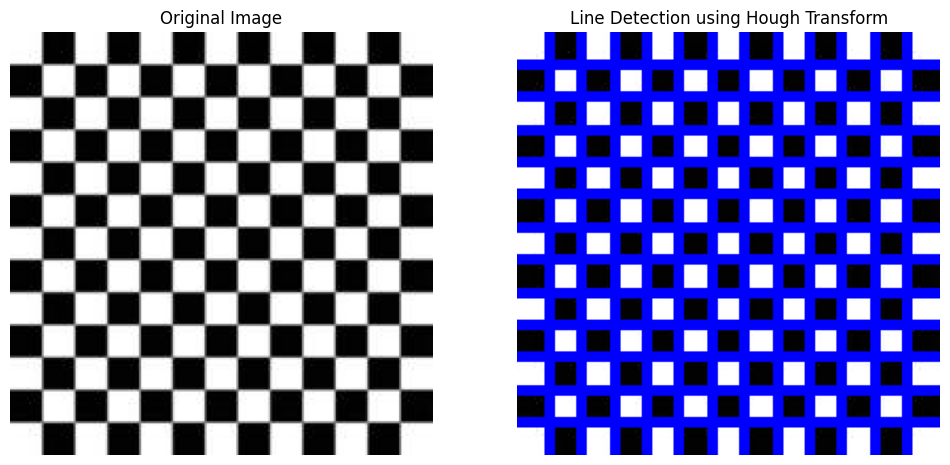

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read image
img = cv2.imread('/content/chess.png', cv2.IMREAD_COLOR)

# Check if image is loaded successfully
if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the edges in the image using Canny detector
    edges = cv2.Canny(gray, 50, 200)

    # Detect points that form a line
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

    # Draw lines on the image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

    # Convert BGR image to RGB for plotting
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert the original image to RGB for comparison
    original_img_rgb = cv2.cvtColor(cv2.imread('/content/chess.png'), cv2.COLOR_BGR2RGB)

    # Plot the original and result images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    axes[0].imshow(original_img_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')  # Remove axes

    # Image with detected lines
    axes[1].imshow(img_rgb)
    axes[1].set_title('Line Detection using Hough Transform')
    axes[1].axis('off')  # Remove axes

    # Display the plot
    plt.show()


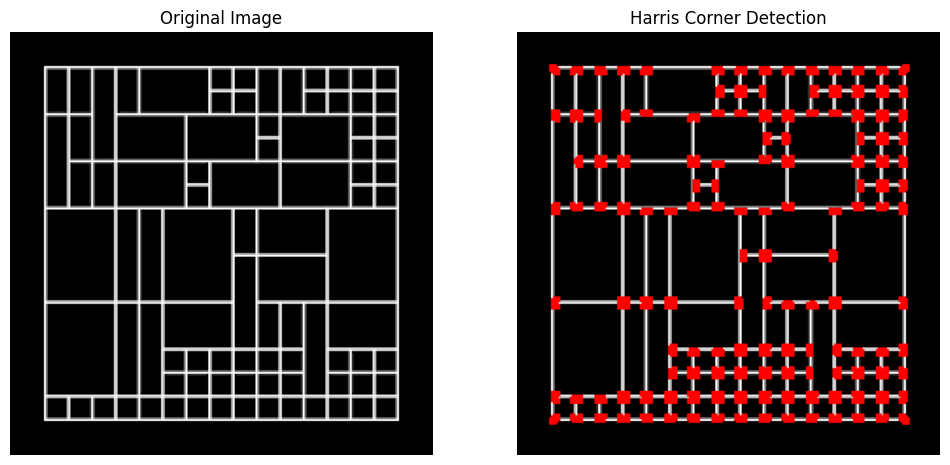

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/download (2).png', cv2.IMREAD_COLOR)

# Check if image is loaded successfully
if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Convert to float32 as required by cornerHarris
    gray_float = np.float32(gray)

    # Apply Harris corner detection
    corners = cv2.cornerHarris(gray_float, 2, 3, 0.04)

    # Dilate the corners to make them visible
    corners = cv2.dilate(corners, None)

    # Mark the corners on the image (for visualization)
    img[corners > 0.01 * corners.max()] = [0, 0, 255]  # Mark corners in red

    # Convert BGR image to RGB for plotting with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert the original image to RGB for comparison
    original_img_rgb = cv2.cvtColor(cv2.imread('/content/download (2).png'), cv2.COLOR_BGR2RGB)

    # Plot the original and result images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    axes[0].imshow(original_img_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')  # Remove axes

    # Image with Harris corners detected
    axes[1].imshow(img_rgb)
    axes[1].set_title('Harris Corner Detection')
    axes[1].axis('off')  # Remove axes

    # Display the plot
    plt.show()


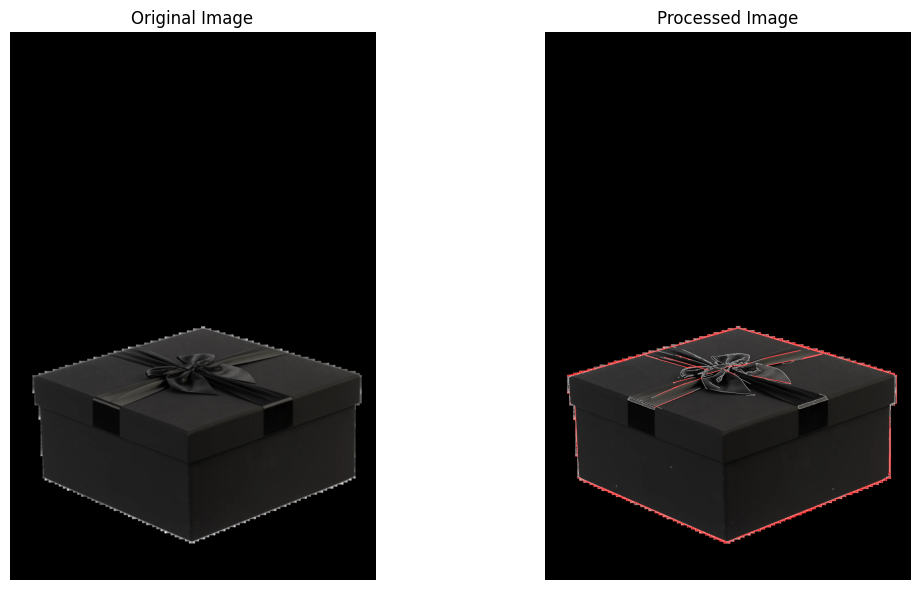

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError(f"Failed to read image from path: {image_path}")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    processed_image = image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(processed_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    harris_corners = cv2.cornerHarris(np.float32(gray), 2, 3, 0.04)
    harris_corners = cv2.dilate(harris_corners, None)
    processed_image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

    mask = edges == 0
    white_background = np.ones_like(image) * 255
    white_background[mask] = processed_image[mask]

    # Show original and processed images side by side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(white_background, cv2.COLOR_BGR2RGB))
    plt.title("Processed Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "/content/O6A6618.webp"
process_image(image_path)
